In [18]:


from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [19]:
data = fetch_20newsgroups(subset='all', categories=['rec.autos', 'sci.space', 'talk.politics.mideast'])
X = data.data
y = data.target


In [20]:


vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X)



In [21]:

X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.3, random_state=42)


In [22]:


model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [23]:


y_pred = model.predict(X_test)


print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       310
           1       1.00      0.99      1.00       292
           2       1.00      0.99      1.00       274

    accuracy                           1.00       876
   macro avg       1.00      1.00      1.00       876
weighted avg       1.00      1.00      1.00       876



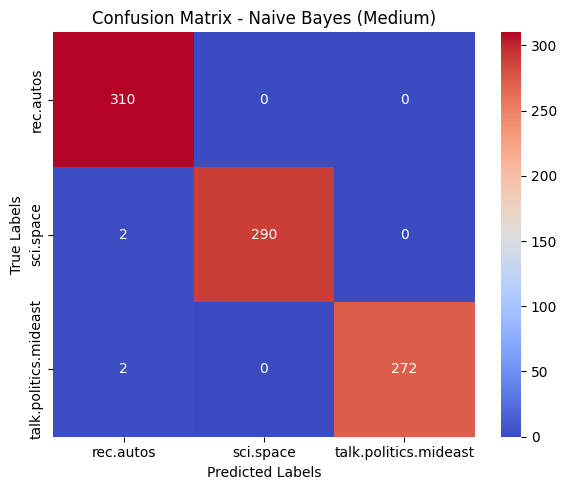

In [24]:


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title("Confusion Matrix - Naive Bayes (Medium)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()